# Welcome to Recitation 12!
This is the last recitation! In this assignment, you will be making predictions based on time series data.

You'll be exposed to many different ways of making predictions and you'll get to see some of the drawbacks of each.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from datetime import datetime

## Data

Read in the SalesAndForecastsByLine.csv into a dataframe.

In [0]:
# YOUR CODE HERE
df = pd.read_csv("SalesAndForecastsByLine.csv")

Print some of the data to see what it all looks like

In [0]:
# YOUR CODE HERE
df.head(20)

,LineNumber,Year,MonthNumber,TotalProductSales
0,101,2000,4,14268
1,101,2000,5,32951
2,101,2000,6,65325
3,101,2000,7,38641
4,101,2000,8,60507
5,101,2000,9,334770
6,101,2000,10,209324
7,101,2000,11,238487
8,101,2000,12,168690
9,101,2001,1,20130


Create a new column in the table called "Date".

Fill this column with the dates as strings in the form month-year. For example May 2020 would be 5-2020.

In [0]:
# YOUR CODE HERE
df["Date"] = df.MonthNumber.astype(str)+"-"+df.Year.astype(str)
df['Date']

0       4-2000
1       5-2000
2       6-2000
3       7-2000
4       8-2000
        ...   
175    11-2002
176    12-2002
177     1-2003
178     2-2003
179     3-2003
Name: Date, Length: 180, dtype: object

Print the data again to see if the column was created properly.

In [0]:
# YOUR CODE HERE
df.head()

,LineNumber,Year,MonthNumber,TotalProductSales,Date
0,101,2000,4,14268,4-2000
1,101,2000,5,32951,5-2000
2,101,2000,6,65325,6-2000
3,101,2000,7,38641,7-2000
4,101,2000,8,60507,8-2000


Separate the data into 5 separate arrays based on the product line number.

In [0]:
# YOUR CODE HERE
y1 = np.array(df["TotalProductSales"][df["LineNumber"]==101])
y1e = np.array(df["TotalProductSales"][df["LineNumber"]==101])
y2 = np.array(df["TotalProductSales"][df["LineNumber"]==102])
y3 = np.array(df["TotalProductSales"][df["LineNumber"]==103])
y4 = np.array(df["TotalProductSales"][df["LineNumber"]==104])
y5 = np.array(df["TotalProductSales"][df["LineNumber"]==105])

Create an array with all of the dates for which we have values. Make sure you don't include repeats.

In [0]:
# YOUR CODE HERE
#all the lines have the same number of dates
x = [datetime.strptime(date,"%m-%Y").date() for date in df["Date"][df["LineNumber"]==101]]
x

[datetime.date(2000, 4, 1),
 datetime.date(2000, 5, 1),
 datetime.date(2000, 6, 1),
 datetime.date(2000, 7, 1),
 datetime.date(2000, 8, 1),
 datetime.date(2000, 9, 1),
 datetime.date(2000, 10, 1),
 datetime.date(2000, 11, 1),
 datetime.date(2000, 12, 1),
 datetime.date(2001, 1, 1),
 datetime.date(2001, 2, 1),
 datetime.date(2001, 3, 1),
 datetime.date(2001, 4, 1),
 datetime.date(2001, 5, 1),
 datetime.date(2001, 6, 1),
 datetime.date(2001, 7, 1),
 datetime.date(2001, 8, 1),
 datetime.date(2001, 9, 1),
 datetime.date(2001, 10, 1),
 datetime.date(2001, 11, 1),
 datetime.date(2001, 12, 1),
 datetime.date(2002, 1, 1),
 datetime.date(2002, 2, 1),
 datetime.date(2002, 3, 1),
 datetime.date(2002, 4, 1),
 datetime.date(2002, 5, 1),
 datetime.date(2002, 6, 1),
 datetime.date(2002, 7, 1),
 datetime.date(2002, 8, 1),
 datetime.date(2002, 9, 1),
 datetime.date(2002, 10, 1),
 datetime.date(2002, 11, 1),
 datetime.date(2002, 12, 1),
 datetime.date(2003, 1, 1),
 datetime.date(2003, 2, 1),
 datetime.d

Plot all of the 5 product lines of sales data with their corresponding dates.

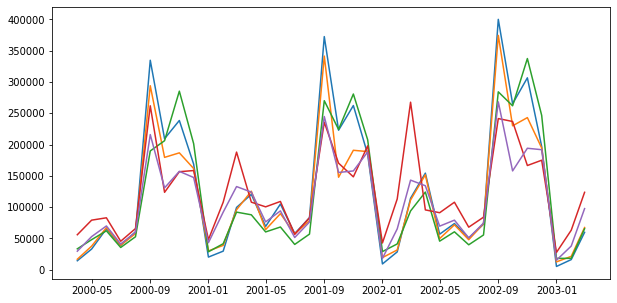

In [0]:
# YOUR CODE HERE
fig = plt.figure(figsize =(10,5))
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.show()

## Linear Fit

We use statsmodels.api for OLS to fit our linear model.

In [0]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Run OLS on the data for product line 101. The first argument it takes is the sales data, and you can just use range(36) for the second argument as it is a simple way of representing the time series.

In [0]:
# YOUR CODE HERE
model1 = sm.OLS(y1,[i for i in range(36)])

Call fit on the model to get ther linear fit.

In [0]:
# YOUR CODE HERE
results1 = model1.fit()

Get a summary of the results so that you can see whatt the different parameters are.

In [0]:
# YOUR CODE HERE
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.478
Model:                            OLS   Adj. R-squared (uncentered):              0.463
Method:                 Least Squares   F-statistic:                              32.07
Date:                Mon, 04 May 2020   Prob (F-statistic):                    2.15e-06
Time:                        19:48:39   Log-Likelihood:                         -472.52
No. Observations:                  36   AIC:                                      947.0
Df Residuals:                      35   BIC:                                      948.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5709.2549   1008.101      5.663      0.000    3662.702    7755.808
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   0.899
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.084
Skew:                           0.409   Prob(JB):                        0.581
Kurtosis:                       2.771   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Use the results to find what the model would have predicted for each point in time that we have. And then plot the prediction on top of a plot of the line 101 data.

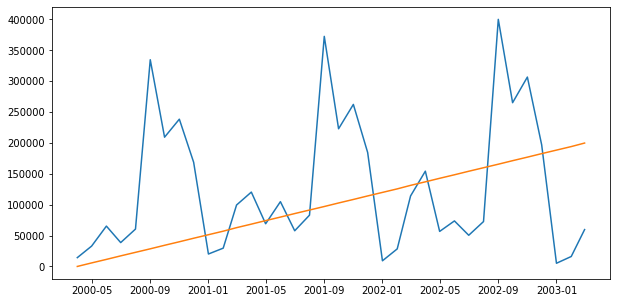

In [0]:
# YOUR CODE HERE
a = results1.predict([i for i in range(36)])
plt.figure(figsize=(10,5))
plt.plot(x,y1)
plt.plot(x,a)
plt.show()


Does this model help us to make reasonable predictions?

What are some drawbacks of this method?

**Answer here.**

##Rolling Average

Find the rolling mean of line 101's product sales. You can call rolling() on the dataframe and then mean() on that.

Start with a window = 5.

In [0]:
# YOUR CODE HERE
y1m = df["TotalProductSales"][df["LineNumber"]==101].rolling(window = 5).mean()

Plot the actual sales data with the rolling average.

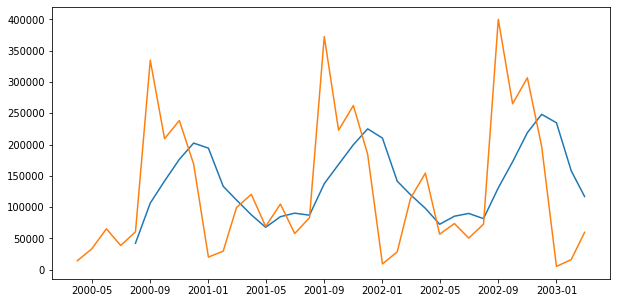

In [0]:
# YOUR CODE HERE
plt.figure(figsize = (10,5))
plt.plot(x,y1m)
plt.plot(x,y1)
plt.show()

Try different values for *window* and see which ones work better.

In [0]:
# YOUR CODE HERE

What is a major pitfall of using a moving average to make predictions?

(Hint: What happens when the rolling window is completely made up of predictions instead of observed values?)

**Answer here.**

##Exponential Smoothing

We are going to uses SimpleExpSmoothing for this

In [0]:
from statsmodels.tsa.api import SimpleExpSmoothing

This only takes the data in a specific series form. The code is provided below. We are using line 102 this time.

In [0]:
simpexp_data = pd.Series(y2,x)

Create a simple exponential fit for the data.

In [0]:
# YOUR CODE HERE
fit1 = SimpleExpSmoothing(simpexp_data).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Get a forecast for the next 4 upcoming values.

In [0]:
# YOUR CODE HERE
fore1 = fit1.forecast(4)

Plot the predictions, the fit, and the original sales data for line 102.

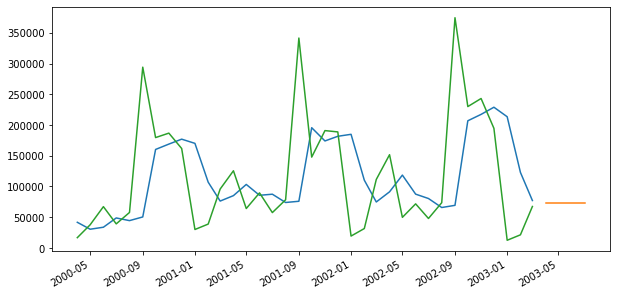

In [0]:
# YOUR CODE HERE
plt.figure(figsize=(10,5))
fit1.fittedvalues.plot()
fore1.plot()
plt.plot(x,y2)
plt.show()

How did this improve upon previous models?

**Answer here.**

Why is this model still not sufficient?

**Answer here.**

##Holt Linear

Import Holt for this part and ExponentialSmoothing for the next part.

In [0]:
## Holt Double Exponential Linear
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing

Run Holt on the data series created for the previous part, the simple exponential smoothing.

In [0]:
# YOUR CODE HERE
fit_holt = Holt(simpexp_data).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Forecast the next 5 values.

In [0]:
# YOUR CODE HERE
ab = fit_holt.forecast(5)

Plot the forecast, fit, and orignal sales data.

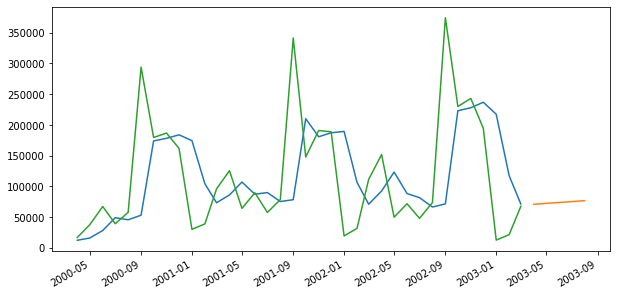

In [0]:
# YOUR CODE HERE
plt.figure(figsize=(10,5))
fit_holt.fittedvalues.plot()
ab.plot()
plt.plot(x,y2)
plt.show()

How is this fit improving upon the simple exponential smoothing fit?

Funnily enough, this is actually the result of *double* exponential smoothing while the previous one was single exponential.

**Answer here.**

##Holt-Winters Method

Run ExponentialSmoothing on the same series of data. Use an additive trend and an additive seasonality.

You have to determine how many data points go in each period of the "seasonal_periods" parameter.

In [0]:
# YOUR CODE HERE
fit_holt2 = ExponentialSmoothing(simpexp_data, trend = "add", seasonal = "add", seasonal_periods = 12).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Generate an entire period's worth of forecasts.

In [0]:
# YOUR CODE HERE
preds = fit_holt2.forecast(12)

Plot the fit, forecasts, and original sales data.

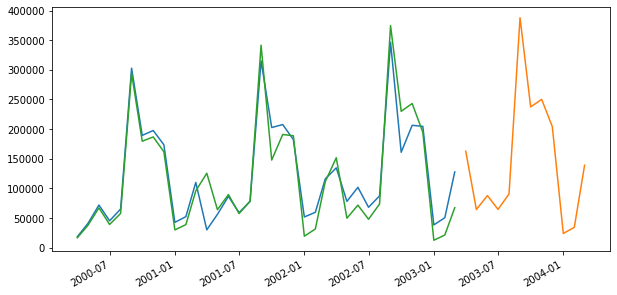

In [0]:
## YOUR CODE HERE
plt.figure(figsize=(10,5))
fit_holt2.fittedvalues.plot()
preds.plot()
plt.plot(x,y2)
plt.show()

Try changing the trend and seasonality type to see what happens. (You will need to determine the trend and seasonality type for yourselves in the homework.)

Why did this work as well as it did? (This method is actually *triple* exponential smoothing.)

**Answer here.**

If you were a sales analyst, would you be content presenting this prediction to your supervisor? Why or why not?

**Answer here.**